# Shearing 2d arrays

In [4]:
from media_tools import *
import cv2

sample_media = "C:/Users/pdazeley-gaist23/PycharmProjects/Image_and_Audio_Generation_and_Editing_using_Python/sample_media/"
image = image_tools.read_image(sample_media + "student_guide.jpg")

# Shearing 2d arrays:

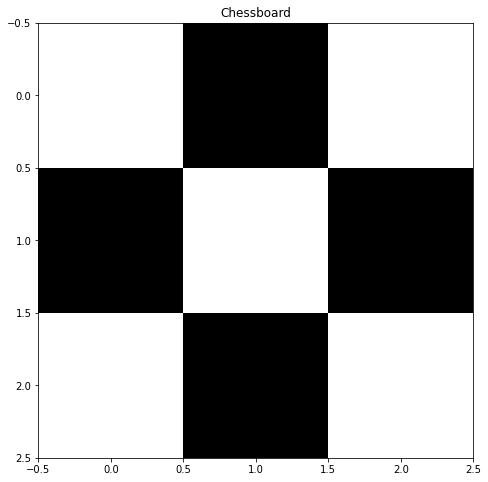

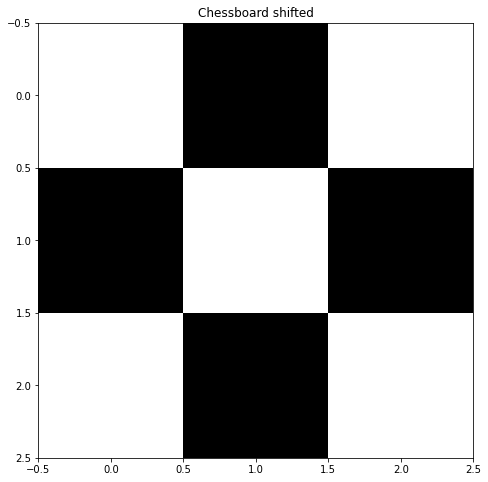

In [2]:
import numpy as np
# create a sample chessboard image
chessboard = np.zeros((3, 3, 3), dtype=np.uint8)
# fill in the chess board pattern
chessboard[::2, ::2] = chessboard[1::2, 1::2] = (255, 255, 255)
# add a blue square in the middle of the chessboard
chessboard[3:5, 3:5] = (0, 255, 255)
# show the chessboard
image_tools.show_image(chessboard, axis=True, title="Chessboard")

# shift every row on the chessboard by the index of the row multiplied by a given amount

def staircase_shift(array, factor, axis=0):
    """
    Shifts every row of an array by the index of the row multiplied by a given amount, (multiplied by 3 to conserve pixels).
    row 1 gets shifted by 1 * factor, row 2 by 2 * factor, etc.
    """
    for i in range(array.shape[axis]):
        array = data_tools.roll_array(array, i * factor * 3, axes=(axis,))
    return array

chessboard_shifted = staircase_shift(chessboard, 2)
image_tools.show_image(chessboard_shifted, axis=True, title="Chessboard shifted")

## Venetian blinds selection:

In [3]:
# fill every other n elements of the array along an axis with blue using numpy
venetian_blinds = np.zeros((8, 8, 3), dtype=np.uint8)
venetian_blinds[::2, ::2] = venetian_blinds[1::2, 1::2] = (255, 255, 255)
venetian_blinds[::2, ::2] = (0, 0, 255)
# image_tools.show_image(venetian_blinds, axis=True, title="Venetian blinds")

def venetian_blinds(array, fill_value, step_size=5, select=3 ,axis=0):
    # fill 3 rows every 5 rows with blue
    array = np.select([array[::step_size, ::step_size, select] == fill_value], [array[::step_size, ::step_size, select]], default=array)
    return array


venetian_blinds_filled = venetian_blinds(chessboard, (0, 0, 255), step_size=6)
image_tools.show_image(venetian_blinds_filled, axis=True, title="Filled venetian blinds")


IndexError: index 3 is out of bounds for axis 2 with size 3

In [ ]:
# shift the rows of the chessboard in alternating directions by a given amount
def shear_2d_array(array, shear_amount):
    shear_matrix = np.array([[1, shear_amount, 0], [0, 1, 0]])
    return cv2.warpAffine(array, shear_matrix, (array.shape[1], array.shape[0]))

sheared_chessboard = shear_2d_array(chessboard, shear_amount=0.99)
image_tools.show_image(sheared_chessboard, axis=True, title="Sheared chessboard")

In [ ]:
shear_amount = 0.99
shear_matrix = np.array([[1, shear_amount, 0], [0, 1, 0]])
shear_image = cv2.warpAffine(chessboard, shear_matrix, (chessboard.shape[1], chessboard.shape[0]), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0), flags=cv2.INTER_NEAREST)
image_tools.show_image(shear_image, axis=True, title="Sheared image")
